<a href="https://colab.research.google.com/github/budur1/ML-projects/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [1]:
from IPython.display import clear_output

In [2]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [3]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 57.4MB/s]


In [4]:
import pandas as pd

!pip install --upgrade scikit-learn

import sklearn
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [5]:
titanic_data = pd.read_csv('titanic.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Print column names in the dataset
print(titanic_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# preprocessing

In [8]:
# Encode categorical variables (convert 'Sex' to numerical)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
# Handle Missing Values
titanic_data['Sex'].fillna(titanic_data['Sex'].median(), inplace=True)

# Drop irrelevant columns and handle missing values
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)



print(titanic_data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [9]:
data_y = titanic_data['Survived'] # tartget
data_x = titanic_data.drop(columns=['Survived']) # freatures --> all clos excepet the target

In [10]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [11]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
print(titanic_data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


data splitting

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size= 0.2, random_state=45)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (712, 6)
Testing features shape: (179, 6)
Training target shape: (712,)
Testing target shape: (179,)


In [14]:
# Print out sample data from the training features and target variables
print("Training Features Sample:")
print(X_train.head())
print("\nTraining Target Sample:")
print(y_train.head())


Training Features Sample:
     Pclass  Sex   Age  SibSp  Parch      Fare
332       1    0  38.0      0      1  153.4625
281       3    0  28.0      0      0    7.8542
147       3    1   9.0      2      2   34.3750
11        1    1  58.0      0      0   26.5500
405       2    0  34.0      1      0   21.0000

Training Target Sample:
332    0
281    0
147    0
11     1
405    0
Name: Survived, dtype: int64


In [15]:

print(titanic_data.dtypes)

# Check for missing values
print(titanic_data.isnull().sum())


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


# Build and train a model

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Mean Accuracy:", accuracy)

Mean Accuracy: 0.8379888268156425


In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,data_x, data_y, cv=5).mean()

0.7845081915761722

In [18]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the testing set
y_pred = model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[102  15]
 [ 14  48]]


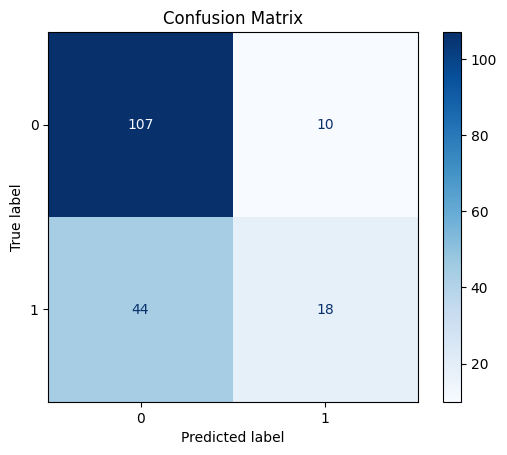

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Initialize and train the model (SVM in this case)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


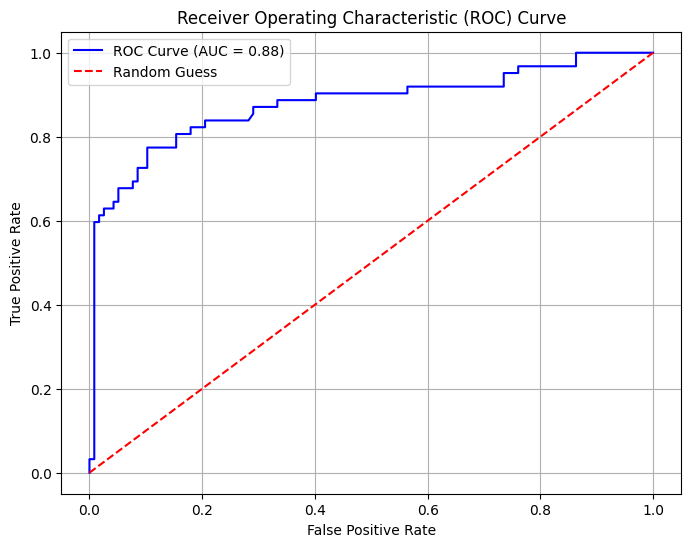

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import numpy as np

data_point = np.array([[1, 1, 65,1,0,0]])

# Make the prediction
prediction = model.predict(data_point)

# Print the prediction
if prediction[0] == 1:
    print("The passenger is predicted to survive.")
else:
    print("The passenger is predicted not to survive.")


probability = model.predict_proba(data_point)
# Extract the probability of survival
survival_probability = probability[0, 1]

# Convert the probability to a percentage
survival_percentage = survival_probability * 100

# Print the probability of survival as a percentage
print("Probability of survival:", survival_percentage, "%")


The passenger is predicted to survive.
Probability of survival: 66.64729244733293 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
import numpy as np


# Male: 0, Third class: 3
data_point = np.array([[3, 0, 60,1,1,1]])


probability = model.predict_proba(data_point)
# Extract the probability of survival
survival_probability = probability[0, 1]

# Convert the probability to a percentage
survival_percentage = survival_probability * 100

# Print the probability of survival as a percentage
print("Probability of survival:", survival_percentage, "%")

Probability of survival: 2.1948063828908406 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
